Problem 1:

A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following .csv file: Fever.csv

1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually.

1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

1.4) Analyse the effects of one variable on another with the help of an interaction plot.
What is an interaction between two treatments?
[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’) with the variable 'Relief' and state your results.

1.6) Mention the business implications of performing ANOVA for this particular case study.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm
%matplotlib inline

In [2]:
fever=pd.read_csv("E:\Great learning data science\Advanced statistics\Project\Fever.csv")
fever.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [3]:
pd.set_option("display.max_columns", 101)
fever.groupby(by=['Volunteer','A','B','Relief']).size()

Volunteer  A  B  Relief
1          1  1  2.4       1
              2  4.6       1
              3  4.8       1
           2  1  5.8       1
              2  8.9       1
              3  9.1       1
           3  1  6.1       1
              2  9.9       1
              3  13.5      1
2          1  1  2.7       1
              2  4.2       1
              3  4.5       1
           2  1  5.2       1
              2  9.1       1
              3  9.3       1
           3  1  5.7       1
              2  10.5      1
              3  13.0      1
3          1  1  2.3       1
              2  4.9       1
              3  4.4       1
           2  1  5.5       1
              2  8.7       1
              3  8.7       1
           3  1  5.9       1
              2  10.6      1
              3  13.3      1
4          1  1  2.5       1
              2  4.7       1
              3  4.6       1
           2  1  5.3       1
              2  9.0       1
              3  9.4       1
           3  1  6.

In [4]:
fever.shape

(36, 4)

In [5]:
fever.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

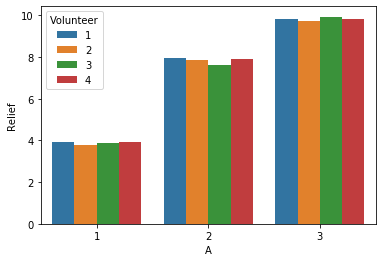

In [6]:
sns.barplot(x=fever['A'],y=fever['Relief'],ci=0,hue=fever['Volunteer'])# 	B 	Volunteer 	

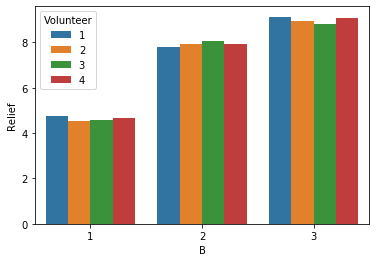

In [7]:
sns.barplot(x=fever['B'],y=fever['Relief'],ci=0,hue=fever['Volunteer'])

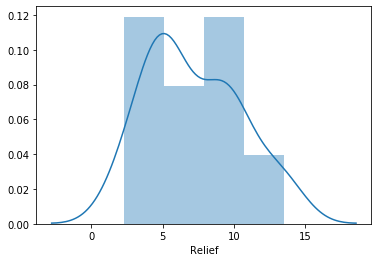

In [8]:
#sns.scatterplot(x=fever['B'],y=fever['Relief'],hue=fever['Volunteer'],ci=0)
sns.distplot(fever['Relief'])

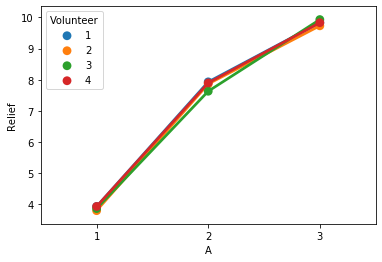

In [9]:
sns.pointplot(x=fever['A'],y=fever['Relief'],hue=fever['Volunteer'],ci=0)

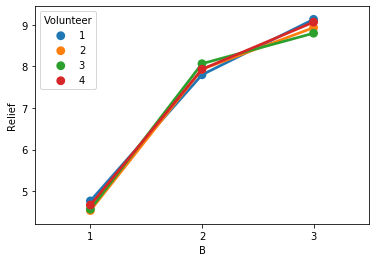

In [10]:
sns.pointplot(x=fever['B'],y=fever['Relief'],hue=fever['Volunteer'],ci=0)

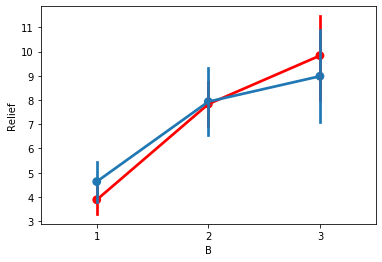

In [11]:
display(sns.pointplot(x=fever['A'],y=fever['Relief'],color="Red"),sns.pointplot(x=fever['B'],y=fever['Relief']))

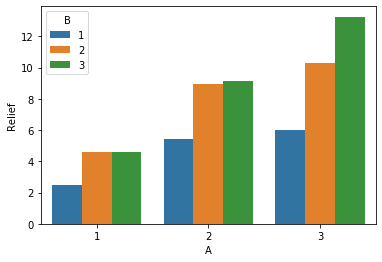

In [12]:
sns.barplot(x=fever['A'],y=fever['Relief'],hue=fever['B'],ci=0)

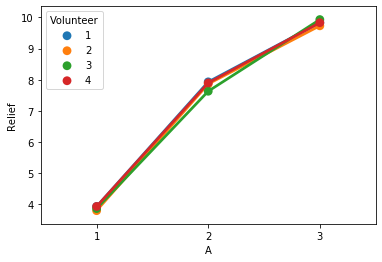

In [13]:
sns.pointplot(x=fever['A'],y=fever['Relief'],hue=fever['Volunteer'],ci=0)

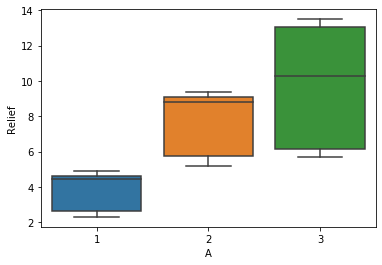

In [14]:
sns.boxplot(x="A", y="Relief", data=fever)

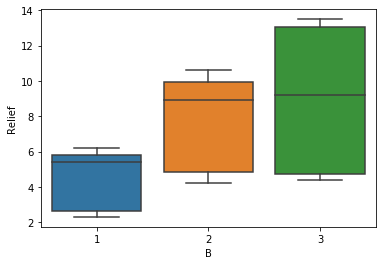

In [15]:
sns.boxplot(x="B", y="Relief", data=fever)

In [16]:
import sympy as sym

mu,theta,sigma =sym.symbols('mu theta sigma')

# 1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually.

Ans:

1.For variable A 
- null hypothesis is 𝜇1=𝜇2=𝜇3
- alternate hypothesis is atleast one out of 𝜇1,𝜇2 or 𝜇3 is not same.

2.For variable B

    
- null hypothesis is 𝜇1=𝜇2=𝜇3
- alternate hypothesis is atleast one out of 𝜇1,𝜇2 or 𝜇3 is not same.


# 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [17]:
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In [18]:
formula = 'Relief ~ C(A)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(A),2.0,220.02,110.010000,23.465387,4.578242e-07
Residual,33.0,154.71,4.688182,NaN,NaN


# Ans: 
  - For A as P value is less than 0.05(4.578242e-07) so null will be rejected(means A has significant effect on relief)

# 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [19]:
formula = 'Relief ~ C(B)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(B),2.0,123.66,61.830000,8.126777,0.00135
Residual,33.0,251.07,7.608182,NaN,NaN



# Ans  
  - For B as P value is less than 0.05(0.00135) so null will be rejected.(means B has significant effect on relief)

# 1.4) Analyse the effects of one variable on another with the help of an interaction plot. What is an interaction between two treatments? [hint: use the ‘pointplot’ function from the ‘seaborn’ function]

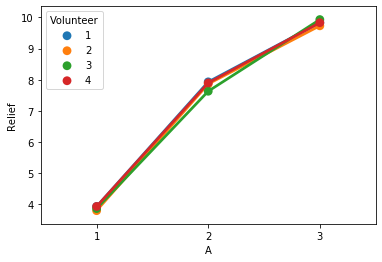

In [20]:
sns.pointplot(fever['A'],fever['Relief'],ci=0,hue=fever['Volunteer'])

# explanation 
- The relief increases as level of 'A' increases.
- The effect of relief is almost same on all volunteers
- The rate of increase of relief from A1 to A2 is more than from A2 to A3.

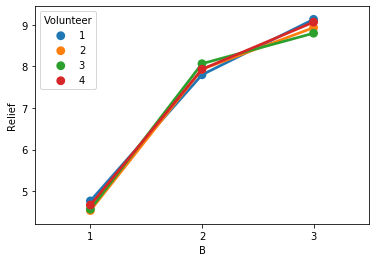

In [21]:
sns.pointplot(fever['B'],fever['Relief'],ci=0,hue=fever['Volunteer'])

# Explanation:
- Relief increases as the level of B increases.
- Rate of increase of relief is more from B1 to B2 and less from B2 to B3.
- The relief varies from volunteer to volunteer as compared to 'A'.

# 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’) with the variable 'Relief' and state your results.

In [22]:
formula = 'Relief ~ C(A)+C(B)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(A),2.0,220.02,110.010000,109.832850,8.514029e-15
C(B),2.0,123.66,61.830000,61.730435,1.546749e-11
Residual,31.0,31.05,1.001613,NaN,NaN


In [23]:
formula = 'Relief ~ C(A)+C(B)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print('\nTable1:\nEffect of A and B=\n\n',aov_table)

formula = 'Relief ~ C(A)+C(B):C(Volunteer)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print('\nTable2:\nEffect of A and B(interaction with Volunteer)=\n\n', aov_table)

formula = 'Relief ~ C(B)+C(A):C(Volunteer)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print('\nTable3:\nEffect of B and A(interaction with Volunteer)=\n\n',aov_table)

formula = 'Relief ~ C(B):C(Volunteer)+C(A):C(Volunteer)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print('\nTable4:\nEffect of A(interaction with Volunteer)and B(interaction with Volunteer)=\n\n',aov_table)


formula = 'Relief ~ (C(B)+C(A)):C(Volunteer)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print('\nTable5:\nEffect of (A + B)(interaction with Volunteer)=\n\n',aov_table)

formula = 'Relief ~ C(A):C(Volunteer)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print('\nTable6:\nEffect of A(interaction with Volunteer)=\n\n',aov_table)

formula = 'Relief ~ C(B):C(Volunteer)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print('\nTable7:\nEffect of B(interaction with Volunteer)=\n\n',aov_table)

formula = 'Relief ~ C(A)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print('\nTable8:\nEffect of B(interaction with Volunteer)=\n\n',aov_table)

formula = 'Relief ~ C(B)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print('\nTable9:\nEffect of B(interaction with Volunteer)=\n\n',aov_table)


Table1:
Effect of A and B=

             df  sum_sq     mean_sq           F        PR(>F)
C(A)       2.0  220.02  110.010000  109.832850  8.514029e-15
C(B)       2.0  123.66   61.830000   61.730435  1.546749e-11
Residual  31.0   31.05    1.001613         NaN           NaN

Table2:
Effect of A and B(interaction with Volunteer)=

                      df      sum_sq     mean_sq          F        PR(>F)
C(A)                2.0  220.020000  110.010000  78.971721  9.123327e-11
C(B):C(Volunteer)  11.0  124.063333   11.278485   8.096367  1.863192e-05
Residual           22.0   30.646667    1.393030        NaN           NaN

Table3:
Effect of B and A(interaction with Volunteer)=

                      df      sum_sq    mean_sq          F        PR(>F)
C(B)                2.0  123.660000  61.830000  44.183413  1.974356e-08
C(A):C(Volunteer)  11.0  220.283333  20.025758  14.310307  1.370125e-07
Residual           22.0   30.786667   1.399394        NaN           NaN

Table4:
Effect of A(interacti

# Ans:
- All above combinations has significant effect on relief except B(interaction with Volunteer)(Table 7)
- It has p value 0.41608(greater than 0.05)

# 1.6) Mention the business implications of performing ANOVA for this particular case study.



# Business Implications:

# - From this ANOVA analysis we conclude that 
- Individual A and B has effect on relief.But combination of A and B increses the relief hours.
- A is more significant than B in the compound AB.
